In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data

In [131]:
train=pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA - Step 1 -> Feature Engineering -> Missing Values

In [132]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

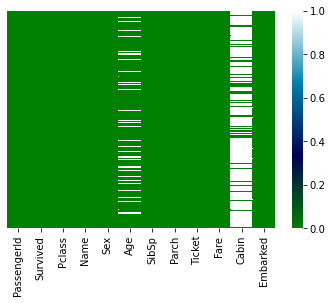

In [133]:
#null values showing in the heat map
sns.heatmap(train.isnull(),yticklabels=False,cmap="ocean")

<AxesSubplot:xlabel='Survived', ylabel='count'>

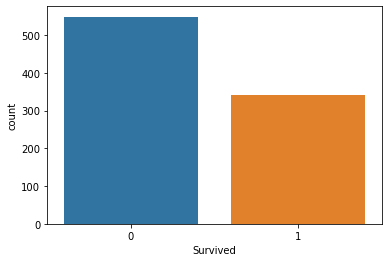

In [134]:
sns.countplot(x="Survived",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

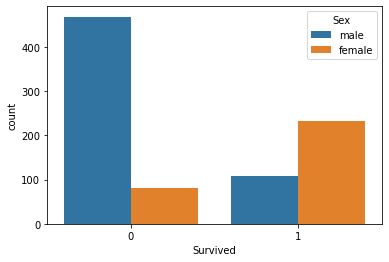

In [135]:
sns.countplot(x="Survived",data=train,hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

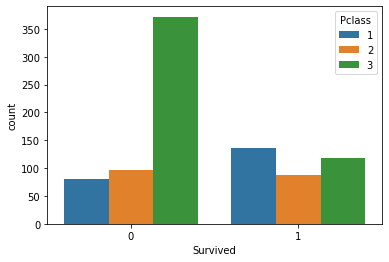

In [136]:
sns.countplot(x="Survived",data=train,hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Count'>

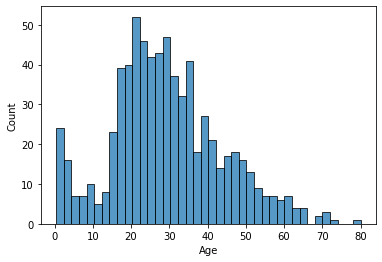

In [137]:
sns.histplot(train["Age"].dropna(),kde=False,bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

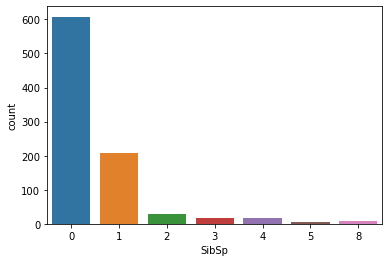

In [138]:
sns.countplot(x="SibSp",data=train)

In [139]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Fare', ylabel='Count'>

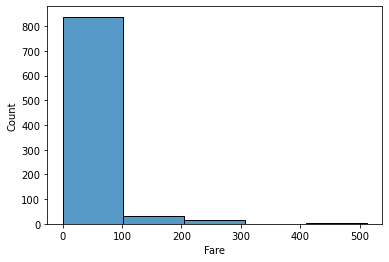

In [140]:
sns.histplot(train["Fare"],bins=5)

## Removing Null Values -> Age and Cabin

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

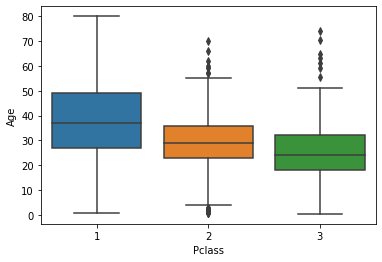

In [141]:
sns.boxplot(y="Age",x="Pclass",data=train)

In [142]:
# repalcing null age values with average values from heatmap
def compute_age(args):
    age=args[0]
    pclass=args[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        if pclass == 2:
            return 29
        if pclass == 3:
            return 24
        
    else:
        return age    

In [143]:
train["Age"]=train[["Age","Pclass"]].apply(compute_age,axis=1)

<AxesSubplot:>

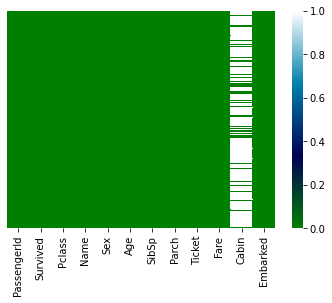

In [144]:
sns.heatmap(data=train.isnull(),yticklabels=False,cmap="ocean")

In [145]:
#dropping the Cabin values because it has lots of null values
train.drop("Cabin",axis=1,inplace=True)

In [146]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

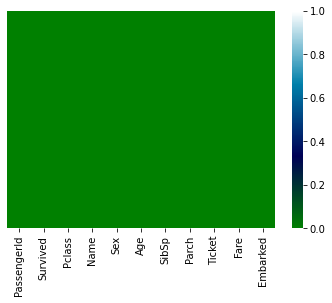

In [147]:
sns.heatmap(train.isnull(),yticklabels=False,cmap="ocean")

In [148]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting required categorical variables into dummy variables -> Sex and Embarked

### after conversion we will drop id,name,sex,ticket,embarked columns from dataset

In [149]:
pd.get_dummies(train["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [150]:
pd.get_dummies(train["Sex"],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [151]:
# coverting categorical variables to dummy variables
embarked=pd.get_dummies(train["Embarked"],drop_first=True)
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [152]:
# dropping categorical columns
train.drop(["PassengerId","Name","Sex","Embarked","Ticket"],axis=1,inplace=True)

In [153]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [155]:
type(train)
##train.drop(["male","Q","S"],axis=1,inplace=True)

pandas.core.frame.DataFrame

In [156]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [157]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [158]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [159]:
# add the new dummy variables to train data set
train = pd.concat([train,sex,embark],axis=1)

In [160]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Building a regression model

In [161]:
### train test split

In [162]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [163]:
## input variables
train.drop("Survived",axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [164]:
# output vairable
train["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split

In [174]:
train_data_input = train.drop("Survived",axis=1)

In [175]:
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [176]:
train_data_ouput = train["Survived"]

In [177]:
train_data_ouput

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [178]:
x_train,x_test,y_train,y_test = train_test_split(train_data_input,train_data_ouput,test_size=0.3,random_state=10)

In [179]:
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
7,3,2.0,3,1,21.0750,1,0,1
765,1,51.0,1,0,77.9583,0,0,1
339,1,45.0,0,0,35.5000,1,0,1
374,3,3.0,3,1,21.0750,0,0,1
183,2,1.0,2,1,39.0000,1,0,1
...,...,...,...,...,...,...,...,...
369,1,24.0,0,0,69.3000,0,0,0
320,3,22.0,0,0,7.2500,1,0,1
527,1,38.0,0,0,221.7792,1,0,1
125,3,12.0,1,0,11.2417,1,0,0


In [180]:
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
590,3,35.0,0,0,7.1250,1,0,1
131,3,20.0,0,0,7.0500,1,0,1
628,3,26.0,0,0,7.8958,1,0,1
195,1,58.0,0,0,146.5208,0,0,0
230,1,35.0,1,0,83.4750,0,0,1
...,...,...,...,...,...,...,...,...
318,1,31.0,0,2,164.8667,0,0,1
863,3,24.0,8,2,69.5500,0,0,1
254,3,41.0,0,2,20.2125,0,0,1
396,3,31.0,0,0,7.8542,0,0,1


In [181]:
y_train

7      0
765    1
339    0
374    0
183    1
      ..
369    1
320    0
527    0
125    1
265    0
Name: Survived, Length: 623, dtype: int64

In [182]:
y_test

590    0
131    0
628    0
195    1
230    1
      ..
318    1
863    0
254    0
396    0
358    1
Name: Survived, Length: 268, dtype: int64

## Training and predicting

In [183]:
from sklearn.linear_model import LogisticRegression

In [194]:
log_model=LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=5000)
log_model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [198]:
y_pred=log_model.predict(x_test)

In [206]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [196]:
from sklearn.metrics import confusion_matrix

In [200]:
accuracy=confusion_matrix(y_test,y_pred)

In [201]:
accuracy

array([[150,  24],
       [ 27,  67]], dtype=int64)

In [202]:
from sklearn.metrics import accuracy_score

In [204]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8097014925373134